# 1000种物品分类

| 更新时间 | 负责人 | 内容 | 备注 |
| --- | --- | --- | --- |
| 2021年12月2日 | Rui | 初次编写文档 | ---- |
| 2022年12月15日 | Rui | 修改文档的编写方式 | 使用 Jupyter notebook 进行编写文档 |
| 2022年1月18日 | Rui | 修改文档，增加效果图 | 通过测试的平台有 MaixII-Dock，使用的是 MaixPy3 0.4.0 |
| 2022年3月15日 | Rui | 修改了部分 API 的使用方式<br>添加了 MaixSense 的使用方式| 一定要将 MaixPy3 升级到 0.4.3 以上 |





## 运行效果

<p align="center">
  <iframe src="//player.bilibili.com/player.html?aid=886250113&bvid=BV1ZK4y1W7DM&cid=288110985&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true" style="max-width:640px; max-height:480px;"> </iframe>
</p>

## 准备

- 确认 MaixPy3 版本为 0.4.3 以上
- 使用支持 MaixPy3 的硬件平台
- 确认硬件可以正常启动
- 确认烧录最新版本系统镜像

## 开始进行分类识别

不同的平台使用的模型量化工具不一样，部署的方式是一样的，只是部署的参数有所不同

### 在 MaixII-Dock 上部署

- 20220113 以后的系统镜像都内置了模型文件 `/home/model/ resnet18_1000_awnn.*`（可以自行[手动转换](./../../develop/resnet.md)）

In [1]:
global Resnet
class Resnet:
    m = {
        "param": "/home/model/resnet18_1000_awnn.param",
        "bin": "/home/model/resnet18_1000_awnn.bin"
    }
    options = {
        "model_type":  "awnn",
        "inputs": {
            "input0": (224, 224, 3)
        },
        "outputs": {
            "output0": (1, 1, 1000)
        },
        "first_layer_conv_no_pad": False,
        "mean": [127.5, 127.5, 127.5],
        "norm": [0.00784313725490196, 0.00784313725490196, 0.00784313725490196],
    }
    def __init__(self):
        from maix import nn
        self.model = nn.load(self.m, opt=self.options)
    def __del__(self):
        del self.model
print(Resnet)


[ rpyc-kernel ]( running at Wed Jan 19 16:18:45 2022 )
<class 'rpyc.core.protocol.Resnet'>

### 在 MaixSense 上部署模型

- 最新的 R329 Armbian 系统镜像中内置了模型文件 `/home/model/aipu_resnet50.bin`


In [ ]:
global Resnet
class Resnet:
    m = {
        "bin": "/home/model/aipu_resnet50.bin"
    }
    options = {
        "model_type":  "aipu",
        "inputs": {
            "input0": (224, 224, 3)
        },
        "outputs": {
            "output0": (1, 1, 1000)
        },
        "mean": [127.5, 127.5, 127.5],
        "norm": [0.0176, 0.0176, 0.0176],
        "scale":[7.539542],
    }
    def __init__(self):
        from maix import nn
        self.model = nn.load(self.m, opt=self.options)
    def __del__(self):
        del self.model
print(Resnet)


## 运行神经网络，进行分类识别


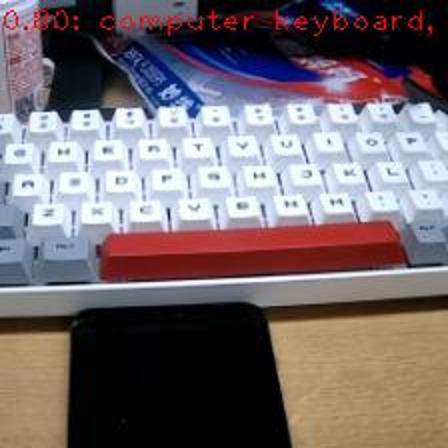


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
import os
os.chdir("/home/res/") # checkout work dir
from classes_label import labels 
from maix import camera, nn, display
resnet = Resnet()
print(resnet.model)
while True:
    img = camera.capture().resize(224, 224)
    out = resnet.model.forward(img, quantize=True)
    msg = "{:.2f}: {}".format(out.max(), labels[out.argmax()])
    img.draw_string(0, 0, str(msg), 1, (255, 0, 0), 1)
    display.show(img)
